Logistic accuracy 0.92 AUC 0.9805756843800322
Regression R2 0.9533910130397288
Saved cluster plot to outputs folder
Saved cluster plot to outputs folder


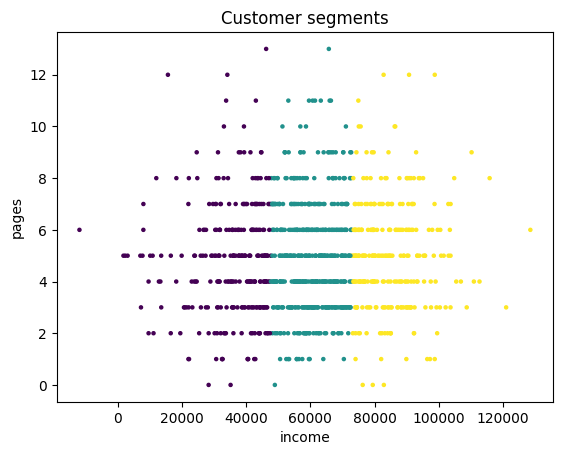

In [15]:
import os, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score
import matplotlib.pyplot as plt
os.makedirs(r'c:\Users\madha\PycharmProjects\Elective_ML_2\outputs', exist_ok=True)
np.random.seed(9)
n=1000
df = pd.DataFrame({'age': np.random.randint(18,70,n),
                   'income': np.random.normal(60000,20000,n).astype(int),
                   'pages': np.random.poisson(5,n)})
df['purchase_amount'] = 0.04*df['income'] + df['pages']*10 + np.random.normal(0,200,n)
df['purchased'] = (df['purchase_amount']>2500).astype(int)
X = df[['age','income','pages']]; y_clf = df['purchased']; y_reg = df['purchase_amount']
X_train, X_test, ytr, yte = train_test_split(X, y_clf, test_size=0.2, random_state=0)
log = LogisticRegression(max_iter=200).fit(X_train, ytr)
pred = log.predict(X_test); prob = log.predict_proba(X_test)[:,1]
print('Logistic accuracy', accuracy_score(yte,pred), 'AUC', roc_auc_score(yte,prob))
reg = LinearRegression().fit(X_train, df.loc[X_train.index,'purchase_amount'])
pred_reg = reg.predict(X_test)
print('Regression R2', r2_score(df.loc[X_test.index,'purchase_amount'], pred_reg))
km = KMeans(n_clusters=3, random_state=0).fit(X)
plt.scatter(X['income'], X['pages'], c=km.labels_, s=5); plt.xlabel('income'); plt.ylabel('pages')
plt.title('Customer segments'); plt.savefig(r'c:\Users\madha\PycharmProjects\Elective_ML_2\outputs\clusters.png')
print('Saved cluster plot to outputs folder')